In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

C:\Anacondaz\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Построение высокодивидендного портфеля с применением классической стратегии "Dogs of the Dow" на панъевропейской фондовой бирже Euronext

## 1. Анализ дивидендной доходности был проведен на основе данных терминала Refinitiv Eikon

__Результаты:__

In [3]:
df = pd.read_excel('growth(DY).xlsx', sheet_name='Sheet5')
df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,EIFFAGE,EIFFAGE,ING GROEP N.V.,AHOLD DEL,GECINA,ING GROEP N.V.,KPN KON,ORANGE,AGEAS,AGEAS,...,ORANGE,ENGIE,ENGIE,VIVENDI SE,ENGIE,EDP,D'IETEREN GROUP,RENAULT,ORANGE,CREDIT AGRICOLE
1,UNIBAIL-RODAMCO-WE,GECINA,ALSTOM,VIVENDI SE,UNIBAIL-RODAMCO-WE,AGEAS,ING GROEP N.V.,KPN KON,CREDIT AGRICOLE,ING GROEP N.V.,...,ENGIE,EDP,EDP,SHELL PLC,SHELL PLC,ENGIE,SOCIETE GENERALE,UNIBAIL-RODAMCO-WE,TOTALENERGIES,YARA INTERNATIONAL
2,VINCI,ARCELORMITTAL SA,EDP,AIRBUS,ORANGE,EDP,SOCIETE GENERALE,SOCIETE GENERALE,ING GROEP N.V.,KBC,...,EDP,ORANGE,SHELL PLC,ENGIE,EDP,SHELL PLC,UNIBAIL-RODAMCO-WE,AKER BP,GALP ENERGIA-NOM,TELENOR
3,DSM KON,DSM KON,AIRBUS,AEGON,REMY COINTREAU,AEGON,GECINA,ING GROEP N.V.,AEGON,CREDIT AGRICOLE,...,BOUYGUES,BOUYGUES,TOTALENERGIES,CREDIT AGRICOLE,CREDIT AGRICOLE,UNIBAIL-RODAMCO-WE,BNP PARIBAS ACT.A,AEGON,CREDIT AGRICOLE,AMUNDI
4,PERNOD RICARD,EDP,GECINA,ING GROEP N.V.,SHELL PLC,SHELL PLC,SHELL PLC,SHELL PLC,ORANGE,BNP PARIBAS ACT.A,...,VEOLIA ENVIRON.,TOTALENERGIES,VIVENDI SE,EDP,NN GROUP,TOTALENERGIES,RANDSTAD NV,SOCIETE GENERALE,TELENOR,BNP PARIBAS ACT.A
5,GECINA,SOCIETE GENERALE,REMY COINTREAU,ORANGE,ING GROEP N.V.,WOLTERS KLUWER,AGEAS,BNP PARIBAS ACT.A,BNP PARIBAS ACT.A,GECINA,...,VIVENDI SE,VEOLIA ENVIRON.,BOUYGUES,ING GROEP N.V.,SOCIETE GENERALE,AGEAS,CREDIT AGRICOLE,SHELL PLC,NN GROUP,KBC
6,SOCIETE GENERALE,RANDSTAD NV,ORANGE,EDP,TOTALENERGIES,BNP PARIBAS ACT.A,BNP PARIBAS ACT.A,TOTALENERGIES,GECINA,RANDSTAD NV,...,TOTALENERGIES,SHELL PLC,VEOLIA ENVIRON.,SOCIETE GENERALE,AEGON,AXA,AEGON,ING GROEP N.V.,RANDSTAD NV,NORSK HYDRO
7,EDP,REMY COINTREAU,SCHNEIDER ELECTRIC,AXA,AGEAS,UNIBAIL-RODAMCO-WE,EDP,AGEAS,RENAULT,AEGON,...,SHELL PLC,VIVENDI SE,GECINA,TOTALENERGIES,AXA,AEGON,AXA,RANDSTAD NV,AGEAS,ORANGE
8,SAINT GOBIAN,UNIBAIL-RODAMCO-WE,SOCIETE GENERALE,AGEAS,DSM KON,AKZO NOBEL,AEGON,VIVENDI SE,RANDSTAD NV,AB INBEV,...,AXA,GECINA,AXA,BNP PARIBAS ACT.A,VEOLIA ENVIRON.,SOCIETE GENERALE,ING GROEP N.V.,NN GROUP,DNB BANK,AXA
9,SHELL PLC,KPN KON,UNIBAIL-RODAMCO-WE,SAINT GOBIAN,SAINT GOBIAN,SOCIETE GENERALE,TOTALENERGIES,SCHNEIDER ELECTRIC,AXA,STMICROELECTRONICS,...,GECINA,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,AEGON,TOTALENERGIES,BNP PARIBAS ACT.A,SHELL PLC,TOTALENERGIES,BOUYGUES,ENGIE


## 2. Сбор данных по доходности портфеля и индекса Euronext-100 по годам

In [3]:
p_10 = pd.DataFrame(columns = ['Portfolio', 'Market'])

year = []
for i in range(18):
    year.append(2005 + i)

lst_10 = []
lst_7 = []
lst_5 = []
lst_3 = []
lst_1 = []
market = []

### Портфель на 2005 год
_По данным за 2004_

Акции:
- GECINA
- UNIBAIL-RODAMCO-WE
- ORANGE
- REMY COINTREAU
- SHELL PLC
- ING GROEP N.V.
- TOTALENERGIES
- AGEAS
- DSM KON
- SAINT GOBIAN


In [4]:
# 10 акций
tickers_list = ['GFC.PA', 
                'URW.AS',
                'ORA.PA',
                'RCO.PA',
                'SHELL.AS',
                'INGA.AS',
                'TTE.PA',
                'AGS.BR',
                'DSM.AS', # split
                'SGO.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
data['DSM.AS'][8:] = data['DSM.AS'][8:] * 2

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-4-790aa403ff24>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.5478665229777918
Growth of Market Index: 0.19947000899008002


<ipython-input-4-790aa403ff24>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DSM.AS'][8:] = data['DSM.AS'][8:] * 2


In [5]:
# 7 акций
tickers_list = ['GFC.PA', 
                'URW.AS',
                'ORA.PA',
                'RCO.PA',
                'SHELL.AS',
                'INGA.AS',
                'TTE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-5-a51fa4f6d50f>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.6164845792391492
Growth of Market Index: 0.19947000899008002


In [6]:
# 5 акций
tickers_list = ['GFC.PA', 
                'URW.AS',
                'ORA.PA',
                'RCO.PA',
                'SHELL.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-6-c86bce93ece5>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.6523461909540678
Growth of Market Index: 0.19947000899008002


In [7]:
# 3 акции
tickers_list = ['GFC.PA', 
                'URW.AS',
                'ORA.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-7-db7f684c9928>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.574600321311848
Growth of Market Index: 0.19947000899008002


In [8]:
# 1 акция
tickers_list = ['GFC.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-8-b990ceac7de4>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.41567806432378424
Growth of Market Index: 0.19947000899008002


### Портфель на 2006 год
_По данным за 2005_

Акции:
- ING GROEP N.V.
- AGEAS
- EDP
- AEGON
- SHELL PLC
- WOLTERS KLUWER
- BNP PARIBAS ACT.A
- UNIBAIL-RODAMCO-WE
- AKZO NOBEL
- SOCIETE GENERALE

In [9]:
# 10 акций
tickers_list = ['INGA.AS', 
                'AGS.BR',
                'EDP.LS',
                'AGN.AS',
                'SHELL.AS',
                'WKL.AS', 
                'BNP.PA', 
                'URW.AS', 
                'AKZA.AS', 
                'GLE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-9-f0fd03b673f8>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3564385730803812
Growth of Market Index: 0.13663092268356408


In [10]:
# 7 акций
tickers_list = ['INGA.AS', 
                'AGS.BR',
                'EDP.LS',
                'AGN.AS',
                'SHELL.AS',
                'WKL.AS', 
                'BNP.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-f884d33681ab>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.2855862107982351
Growth of Market Index: 0.13663092268356408


In [11]:
# 5 акций
tickers_list = ['INGA.AS', 
                'AGS.BR',
                'EDP.LS',
                'AGN.AS',
                'SHELL.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']

data['N-100'] = dt['^N100'].to_list()
    
portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-11-dc224337c5ea>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.259419053415892
Growth of Market Index: 0.13663092268356408


In [12]:
# 3 акции
tickers_list = ['INGA.AS', 
                'AGS.BR',
                'EDP.LS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-12-172b250ab9d8>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.28718212089168993
Growth of Market Index: 0.13663092268356408


In [13]:
# 1 акция
tickers_list = ['INGA.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-13-62f4708202f3>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.2883728222538932
Growth of Market Index: 0.13663092268356408


### Портфель на 2007 год
_По данным за 2006_

Акции:
- KPN KON
- ING GROEP N.V.
- SOCIETE GENERALE
- GECINA
- SHELL PLC
- AGEAS
- BNP PARIBAS ACT.A
- EDP
- AEGON
- TOTALENERGIES


In [14]:
# 10 акций
tickers_list = ['KPN.AS',
                'INGA.AS',
                'GLE.PA',
                'GFC.PA', 
                'SHELL.AS',
                'AGS.BR',
                'BNP.PA',
                'EDP.LS', 
                'AGN.AS', 
                'TTE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-14-61da1f1f7b44>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.04322923953989906
Growth of Market Index: 0.021471588059834262


In [15]:
# 7 акций
tickers_list = ['KPN.AS',
                'INGA.AS',
                'GLE.PA',
                'GFC.PA', 
                'SHELL.AS',
                'AGS.BR',
                'BNP.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-15-e06172f8ad12>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.07349250321455336
Growth of Market Index: 0.021471588059834262


In [16]:
# 5 акций
tickers_list = ['KPN.AS',
                'INGA.AS',
                'GLE.PA',
                'GFC.PA', 
                'SHELL.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-16-838904d7ebaa>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.0008070020559885198
Growth of Market Index: 0.021471588059834262


In [17]:
# 3 акции
tickers_list = ['KPN.AS',
                'INGA.AS',
                'GLE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-17-cf4518823144>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.00030443877066420354
Growth of Market Index: 0.021471588059834262


In [18]:
# 1 акция
tickers_list = ['KPN.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-daf21ab82cb4>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.7382061927733894
Growth of Market Index: 0.021471588059834262


### Портфель на 2008 год
_По данным за 2007_

Акции:
- ORANGE
- KPN KON
- SOCIETE GENERALE
- ING GROEP N.V.
- SHELL PLC
- BNP PARIBAS ACT.A
- TOTALENERGIES
- AGEAS
- VIVENDI SE
- SCHNEIDER ELECTRIC


In [19]:
# 10 акций
tickers_list = ['ORA.PA',
                'KPN.AS',
                'GLE.PA',
                'INGA.AS',
                'SHELL.AS',
                'BNP.PA',
                'TTE.PA',
                'AGS.BR',
                'VIV.PA',
                'SU.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-97c120cc1941>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.42774830084816307
Growth of Market Index: -0.3696484535293455


In [20]:
# 7 акций
tickers_list = ['ORA.PA',
                'KPN.AS',
                'GLE.PA',
                'INGA.AS',
                'SHELL.AS',
                'BNP.PA',
                'TTE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-20-a4a0a6119888>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.29062817166730665
Growth of Market Index: -0.3696484535293455


In [21]:
# 5 акций
tickers_list = ['ORA.PA',
                'KPN.AS',
                'GLE.PA',
                'INGA.AS',
                'SHELL.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-21-ed0ae0200e1c>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.3121841210024178
Growth of Market Index: -0.3696484535293455


In [22]:
# 3 акции
tickers_list = ['ORA.PA',
                'KPN.AS',
                'GLE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-22-d0beee7afa51>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.31765763445204087
Growth of Market Index: -0.3696484535293455


In [23]:
# 1 акция
tickers_list = ['ORA.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-40418d68ba84>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.1656242206703872
Growth of Market Index: -0.3696484535293455


### Портфель на 2009 год
_По данным за 2008_

- AGEAS
- CREDIT AGRICOLE
- ING GROEP N.V.
- AEGON
- ORANGE
- BNP PARIBAS ACT.A
- GECINA
- RENAULT
- RANDSTAD NV
- AXA


In [24]:
# 10 акций
tickers_list = ['AGS.BR',
                'ACA.PA',
                'INGA.AS',
                'AGN.AS',
                'ORA.PA',
                'BNP.PA',
                'GFC.PA',
                'RNO.PA', 
                'RAND.AS',
                'CS.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-24-e8780536ddaf>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.8662484847309566
Growth of Market Index: 0.3179900127708061


In [25]:
# 7 акций
tickers_list = ['AGS.BR',
                'ACA.PA',
                'INGA.AS',
                'AGN.AS',
                'ORA.PA',
                'BNP.PA',
                'GFC.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-25-16f62c223093>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.7560422027287373
Growth of Market Index: 0.3179900127708061


In [26]:
# 5 акций
tickers_list = ['AGS.BR',
                'ACA.PA',
                'INGA.AS',
                'AGN.AS',
                'ORA.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-26-5945d94666db>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.4359353026480982
Growth of Market Index: 0.3179900127708061


In [27]:
# 3 акции
tickers_list = ['AGS.BR',
                'ACA.PA',
                'INGA.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-27-ac5c9eae17a8>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.5570336588049767
Growth of Market Index: 0.3179900127708061


In [28]:
# 1 акция
tickers_list = ['AGS.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-28-99c6f6e182a0>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.6922578178284793
Growth of Market Index: 0.3179900127708061


## Портфель на 2010 год
_По данным за 2009_

- AGEAS
- ING GROEP N.V.
- KBC
- CREDIT AGRICOLE
- BNP PARIBAS ACT.A
- GECINA
- RANDSTAD NV
- AEGON
- AB INBEV
- STMICROELECTRONICS


In [29]:
# 10 акций
tickers_list = ['AGS.BR',
                'INGA.AS',
                'KBC.BR',
                'ACA.PA',
                'BNP.PA',
                'GFC.PA',
                'RAND.AS', 
                'AGN.AS',
                'ABI.BR',
                'STMPA.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-29-94e5faff94ec>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.09896760727688178
Growth of Market Index: 0.048445821202046484


In [30]:
# 7 акций
tickers_list = ['AGS.BR',
                'INGA.AS',
                'KBC.BR',
                'ACA.PA',
                'BNP.PA',
                'GFC.PA',
                'RAND.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-30-416374839836>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.06754269774485651
Growth of Market Index: 0.048445821202046484


In [31]:
# 5 акций
tickers_list = ['AGS.BR',
                'INGA.AS',
                'KBC.BR',
                'ACA.PA',
                'BNP.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-31-6b2f1374cf33>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.0985463591889813
Growth of Market Index: 0.048445821202046484


In [32]:
# 3 акции
tickers_list = ['AGS.BR',
                'INGA.AS',
                'KBC.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-32-ea7bb16f6276>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.17807795331801654
Growth of Market Index: 0.048445821202046484


In [33]:
# 1 акция
tickers_list = ['AGS.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-33-f41e90ba608b>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.2382294418845178
Growth of Market Index: 0.048445821202046484


## Портфель на 2011 год
_По данным за 2010_

- ING GROEP N.V.
- ORANGE
- VIVENDI SE
- SHELL PLC
- KPN KON
- TOTALENERGIES
- UNIBAIL-RODAMCO-WE
- ENGIE
- EDP
- VEOLIA ENVIRON.


In [34]:
# 10 акций
tickers_list = ['INGA.AS',
                'ORA.PA',
                'VIV.PA',
                'SHELL.AS',
                'KPN.AS',
                'TTE.PA',
                'URW.AS', 
                'ENGI.PA',
                'EDP.LS',
                'VIE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-34-f60872cdf4b3>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.006023197350669416
Growth of Market Index: -0.17258661078599236


In [35]:
# 7 акций
tickers_list = ['INGA.AS',
                'ORA.PA',
                'VIV.PA',
                'SHELL.AS',
                'KPN.AS',
                'TTE.PA',
                'URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-35-462e1c4a5948>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.04940856214326251
Growth of Market Index: -0.17258661078599236


In [36]:
# 5 акций
tickers_list = ['INGA.AS',
                'ORA.PA',
                'VIV.PA',
                'SHELL.AS',
                'KPN.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-36-52423065b3d6>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.03273084025891091
Growth of Market Index: -0.17258661078599236


In [37]:
# 3 акции
tickers_list = ['INGA.AS',
                'ORA.PA',
                'VIV.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-37-fad9ac2e4e82>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.06530053642277761
Growth of Market Index: -0.17258661078599236


In [38]:
# 1 акция
tickers_list = ['INGA.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-38-0e51cd75d925>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.33205194052462744
Growth of Market Index: -0.17258661078599236


### Портфель на 2012 год
_По данным за 2011_

- ORANGE
- KPN KON
- VIVENDI SE
- EDP
- UNIBAIL-RODAMCO-WE
- ENGIE
- TOTALENERGIES
- VEOLIA ENVIRON.
- SANOFI
- BOUYGUES


In [39]:
# 10 акций
tickers_list = ['ORA.PA',
                'KPN.AS',
                'VIV.PA', # split
                'EDP.LS',
                'URW.AS',
                'ENGI.PA',
                'TTE.PA',
                'VIE.PA',
                'SAN.PA',
                'EN.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
data['VIV.PA'][5:] = data['VIV.PA'][5:] / 30 * 31

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-39-e8d2d3a1b2ee>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.30467101346587033
Growth of Market Index: 0.10936048084266803


<ipython-input-39-e8d2d3a1b2ee>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['VIV.PA'][5:] = data['VIV.PA'][5:] / 30 * 31


In [40]:
# 7 акций
tickers_list = ['ORA.PA',
                'KPN.AS',
                'VIV.PA', # split
                'EDP.LS',
                'URW.AS',
                'ENGI.PA',
                'TTE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
data['VIV.PA'][5:] = data['VIV.PA'][5:] / 30 * 31

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-40-555d18b09545>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.29491280093643035
Growth of Market Index: 0.10936048084266803


<ipython-input-40-555d18b09545>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['VIV.PA'][5:] = data['VIV.PA'][5:] / 30 * 31


In [41]:
# 5 акций
tickers_list = ['ORA.PA',
                'KPN.AS',
                'VIV.PA', # split
                'EDP.LS',
                'URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
data['VIV.PA'][5:] = data['VIV.PA'][5:] / 30 * 31

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-41-6db74997975b>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.35821361986580563
Growth of Market Index: 0.10936048084266803


<ipython-input-41-6db74997975b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['VIV.PA'][5:] = data['VIV.PA'][5:] / 30 * 31


In [42]:
# 3 акции
tickers_list = ['ORA.PA',
                'KPN.AS',
                'VIV.PA'] #split

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
data['VIV.PA'][5:] = data['VIV.PA'][5:] / 30 * 31

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-42-3270bbc8392e>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.11061239938292473
Growth of Market Index: 0.10936048084266803


<ipython-input-42-3270bbc8392e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['VIV.PA'][5:] = data['VIV.PA'][5:] / 30 * 31


In [43]:
# 1 акция
tickers_list = ['ORA.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-43-78c897d41825>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.07123631666354224
Growth of Market Index: 0.10936048084266803


### Портфель на 2013 год
_По данным за 2012_

- ORANGE
- KPN KON
- EDP
- VEOLIA ENVIRON.
- ENGIE
- BOUYGUES
- VIVENDI SE
- GECINA
- CARREFOUR
- AXA


In [44]:
# 10 акций
tickers_list = ['ORA.PA',
                'KPN.AS',
                'EDP.LS',
                'VIE.PA',
                'ENGI.PA',
                'EN.PA',
                'VIV.PA',
                'GFC.PA',
                'CA.PA',
                'CS.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-44-e5f7c34c0351>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3899242749400699
Growth of Market Index: 0.15915794648500597


In [45]:
# 7 акций
tickers_list = ['ORA.PA',
                'KPN.AS',
                'EDP.LS',
                'VIE.PA',
                'ENGI.PA',
                'EN.PA',
                'VIV.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-45-6f71c265c833>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.4141007870261016
Growth of Market Index: 0.15915794648500597


In [46]:
# 5 акций
tickers_list = ['ORA.PA',
                'KPN.AS',
                'EDP.LS',
                'VIE.PA',
                'ENGI.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-46-ec3e5a358e26>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.347976242433922
Growth of Market Index: 0.15915794648500597


In [47]:
# 3 акции
tickers_list = ['ORA.PA',
                'KPN.AS',
                'EDP.LS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-47-e9953837f132>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.17568450566308272
Growth of Market Index: 0.15915794648500597


In [48]:
# 1 акция
tickers_list = ['ORA.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-48-90372c894a4e>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.209043689393008
Growth of Market Index: 0.15915794648500597


### Портфель на 2014 год
_По данным за 2013_

- ORANGE
- ENGIE
- EDP
- BOUYGUES
- VEOLIA ENVIRON.
- VIVENDI SE
- TOTALENERGIES
- SHELL PLC
- AXA
- GECINA


In [49]:
# 10 акций
tickers_list = ['ORA.PA',
                'ENGI.PA',
                'EDP.LS',
                'EN.PA',
                'VIE.PA',
                'VIV.PA',
                'TTE.PA',
                'SHELL.AS',
                'CS.PA',
                'GFC.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-49-3165317912f9>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.2534268514292325
Growth of Market Index: 0.06730402666123084


In [50]:
# 7 акций
tickers_list = ['ORA.PA',
                'ENGI.PA',
                'EDP.LS',
                'EN.PA',
                'VIE.PA',
                'VIV.PA',
                'TTE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-50-aba32d90f865>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.2619842079679073
Growth of Market Index: 0.06730402666123084


In [51]:
# 5 акций
tickers_list = ['ORA.PA',
                'ENGI.PA',
                'EDP.LS',
                'EN.PA',
                'VIE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-51-d15d47f59716>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.36655862249288307
Growth of Market Index: 0.06730402666123084


In [52]:
# 3 акции
tickers_list = ['ORA.PA',
                'ENGI.PA',
                'EDP.LS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-52-2af618f315c9>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.5218766154389451
Growth of Market Index: 0.06730402666123084


In [53]:
# 1 акция
tickers_list = ['ORA.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-53-c1f490033d8d>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.7325256238588983
Growth of Market Index: 0.06730402666123084


### Портфель на 2015 год
_По данным за 2014_

- ENGIE
- EDP
- ORANGE
- BOUYGUES
- TOTALENERGIES
- VEOLIA ENVIRON.
- SHELL PLC
- VIVENDI SE
- GECINA
- UNIBAIL-RODAMCO-WE


In [54]:
# 10 акций
tickers_list = ['ENGI.PA',
                'EDP.LS',
                'ORA.PA',
                'EN.PA',
                'TTE.PA',
                'VIE.PA',
                'SHELL.AS',
                'VIV.PA',
                'GFC.PA',
                'URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-54-8490716731e9>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.06919070514008488
Growth of Market Index: 5.51571162916746e-05


In [55]:
# 7 акций
tickers_list = ['ENGI.PA',
                'EDP.LS',
                'ORA.PA',
                'EN.PA',
                'TTE.PA',
                'VIE.PA',
                'SHELL.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-55-cbd876a5e247>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.1158559379749003
Growth of Market Index: 5.51571162916746e-05


In [56]:
# 5 акций
tickers_list = ['ENGI.PA',
                'EDP.LS',
                'ORA.PA',
                'EN.PA',
                'TTE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-56-f52096444f06>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.10538157143805328
Growth of Market Index: 5.51571162916746e-05


In [57]:
# 3 акции
tickers_list = ['ENGI.PA',
                'EDP.LS',
                'ORA.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-57-bf4c8a3f4212>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.03565785982728072
Growth of Market Index: 5.51571162916746e-05


In [58]:
# 1 акция
tickers_list = ['ENGI.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-58-aa38aec0e35b>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.02335094031156281
Growth of Market Index: 5.51571162916746e-05


### Портфель на 2016 год
_По данным за 2015_

- ENGIE
- EDP
- SHELL PLC
- TOTALENERGIES
- VIVENDI SE
- BOUYGUES
- VEOLIA ENVIRON.
- GECINA
- AXA
- UNIBAIL-RODAMCO-WE


In [59]:
# 10 акций
tickers_list = ['ENGI.PA',
                'EDP.LS',
                'SHELL.AS',
                'TTE.PA',
                'VIV.PA',
                'EN.PA',
                'VIE.PA',
                'GFC.PA',
                'CS.PA',
                'URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-59-6f63b81b3a4c>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.13932827027975533
Growth of Market Index: 0.06815741471745218


In [60]:
# 7 акций
tickers_list = ['ENGI.PA',
                'EDP.LS',
                'SHELL.AS',
                'TTE.PA',
                'VIV.PA',
                'EN.PA',
                'VIE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-60-eae8b855ae8d>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.15432893094833083
Growth of Market Index: 0.06815741471745218


In [61]:
# 5 акций
tickers_list = ['ENGI.PA',
                'EDP.LS',
                'SHELL.AS',
                'TTE.PA',
                'VIV.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-61-abbcd05c6f8c>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.2781007045573201
Growth of Market Index: 0.06815741471745218


In [62]:
# 3 акций
tickers_list = ['ENGI.PA',
                'EDP.LS',
                'SHELL.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-62-c1f7045d6954>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3076441688687714
Growth of Market Index: 0.06815741471745218


In [63]:
# 1 акций
tickers_list = ['ENGI.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-63-0e00d9cf23ea>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.012491546945410303
Growth of Market Index: 0.06815741471745218


### Портфель на 2017 год
_По данным за 2016_

- VIVENDI SE
- SHELL PLC
- ENGIE
- CREDIT AGRICOLE
- EDP
- ING GROEP N.V.
- SOCIETE GENERALE
- TOTALENERGIES
- BNP PARIBAS ACT.A
- AEGON


In [64]:
# 10 акций
tickers_list = ['VIV.PA',
                'SHELL.AS',
                'ENGI.PA',
                'ACA.PA',
                'EDP.LS',
                'INGA.AS',
                'GLE.PA',
                'TTE.PA',
                'BNP.PA',
                'AGN.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-64-2aa32af36213>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.20178652875139885
Growth of Market Index: 0.1265844621818733


In [65]:
# 7 акций
tickers_list = ['VIV.PA',
                'SHELL.AS',
                'ENGI.PA',
                'ACA.PA',
                'EDP.LS',
                'INGA.AS',
                'GLE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-65-20010c86c11b>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.25349737873321976
Growth of Market Index: 0.1265844621818733


In [66]:
# 5 акций
tickers_list = ['VIV.PA',
                'SHELL.AS',
                'ENGI.PA',
                'ACA.PA',
                'EDP.LS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
#data['OR.PA'][8:] = data['OR.PA'][8:] * 2

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-66-bc76714e5f76>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3417415207629973
Growth of Market Index: 0.1265844621818733


In [67]:
# 3 акции
tickers_list = ['VIV.PA',
                'SHELL.AS',
                'ENGI.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
#data['OR.PA'][8:] = data['OR.PA'][8:] * 2

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-67-3a1200d0f821>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.36566658592006496
Growth of Market Index: 0.1265844621818733


In [68]:
# 1 акция
tickers_list = ['VIV.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
#data['OR.PA'][8:] = data['OR.PA'][8:] * 2

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed


<ipython-input-68-105c095f0f1a>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3809043811377574
Growth of Market Index: 0.1265844621818733


### Портфель на 2018 год
_По данным за 2017_

- ENGIE
- SHELL PLC
- EDP
- CREDIT AGRICOLE
- NN GROUP
- SOCIETE GENERALE
- AEGON
- AXA
- VEOLIA ENVIRON.
- TOTALENERGIES


In [69]:
# 10 акций
tickers_list = ['ENGI.PA',
                'SHELL.AS',
                'EDP.LS',
                'ACA.PA', # split
                'NN.AS',
                'GLE.PA',
                'AGN.AS',
                'CS.PA',
                'VIE.PA',
                'TTE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
data['ACA.PA'][5:] = data['ACA.PA'][5:] / 26 * 27

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-69-928a29085e1b>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.05323865023460263
Growth of Market Index: -0.13769519766433444


<ipython-input-69-928a29085e1b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ACA.PA'][5:] = data['ACA.PA'][5:] / 26 * 27


In [70]:
# 7 акций
tickers_list = ['ENGI.PA',
                'SHELL.AS',
                'EDP.LS',
                'ACA.PA', # split
                'NN.AS',
                'GLE.PA',
                'AGN.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
data['ACA.PA'][5:] = data['ACA.PA'][5:] / 26 * 27

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)


print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-70-e2007d838fa2>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.08704046810175255
Growth of Market Index: -0.13769519766433444


<ipython-input-70-e2007d838fa2>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ACA.PA'][5:] = data['ACA.PA'][5:] / 26 * 27


In [71]:
# 5 акций
tickers_list = ['ENGI.PA',
                'SHELL.AS',
                'EDP.LS',
                'ACA.PA', # split
                'NN.AS']


data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
data['ACA.PA'][5:] = data['ACA.PA'][5:] / 26 * 27

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-71-a2543375c475>:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.0013494164248667449
Growth of Market Index: -0.13769519766433444


<ipython-input-71-a2543375c475>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ACA.PA'][5:] = data['ACA.PA'][5:] / 26 * 27


In [72]:
# 3 акции
tickers_list = ['ENGI.PA',
                'SHELL.AS',
                'EDP.LS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-72-d459f0f2f899>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.0626615833608313
Growth of Market Index: -0.13769519766433444


In [73]:
# 1 акция
tickers_list = ['ENGI.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-73-4d357c1fdf77>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.026567691667905704
Growth of Market Index: -0.13769519766433444


### Портфель на 2019 год
_По данным за 2018_

- EDP
- ENGIE
- SHELL PLC
- UNIBAIL-RODAMCO-WE
- TOTALENERGIES
- AGEAS
- AXA
- AEGON
- SOCIETE GENERALE
- BNP PARIBAS ACT.A

In [74]:
# 10 акций
tickers_list = ['EDP.LS',
                'ENGI.PA',
                'SHELL.AS',
                'URW.AS',
                'TTE.PA',
                'AGS.BR',
                'CS.PA',
                'AGN.AS',
                'GLE.PA',
                'BNP.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-74-a41a4f6e4dff>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.1967155632009049
Growth of Market Index: 0.17602511906277696


In [75]:
# 7 акций
tickers_list = ['EDP.LS',
                'ENGI.PA',
                'SHELL.AS',
                'URW.AS',
                'TTE.PA',
                'AGS.BR',
                'CS.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-75-8a5835489161>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.14891786535146748
Growth of Market Index: 0.17602511906277696


In [76]:
# 5 акций
tickers_list = ['EDP.LS',
                'ENGI.PA',
                'SHELL.AS',
                'URW.AS',
                'TTE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-76-c5961629f8ec>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.08414593819968141
Growth of Market Index: 0.17602511906277696


In [77]:
# 3 акции
tickers_list = ['EDP.LS',
                'ENGI.PA',
                'SHELL.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-77-a1107ec5d29b>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.13885058752281462
Growth of Market Index: 0.17602511906277696


In [78]:
# 1 акция
tickers_list = ['EDP.LS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-78-a154ebc57bcb>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.5189476111227121
Growth of Market Index: 0.17602511906277696


### Портфель на 2020 год
_По данным за 2019_

- D'IETEREN GROUP
- SOCIETE GENERALE
- UNIBAIL-RODAMCO-WE
- BNP PARIBAS ACT.A
- RANDSTAD NV
- CREDIT AGRICOLE
- AEGON
- AXA
- ING GROEP N.V.
- SHELL PLC


In [79]:
# 10 акций
tickers_list = ['DIE.BR',
                'GLE.PA',
                'URW.AS',
                'BNP.PA',
                'RAND.AS',
                'ACA.PA',
                'AGN.AS',
                'CS.PA',
                'INGA.AS',
                'SHELL.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-79-54170bf81df0>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.05036920476825959
Growth of Market Index: -0.014898674109102353


In [80]:
# 7 акций
tickers_list = ['DIE.BR',
                'GLE.PA',
                'URW.AS',
                'BNP.PA',
                'RAND.AS',
                'ACA.PA',
                'AGN.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-80-627a693f1744>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.03556605325903286
Growth of Market Index: -0.014898674109102353


In [81]:
# 5 акций
tickers_list = ['DIE.BR',
                'GLE.PA',
                'URW.AS',
                'BNP.PA',
                'RAND.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-81-ff99050158cc>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.03199940075218304
Growth of Market Index: -0.014898674109102353


In [82]:
# 3 акции
tickers_list = ['DIE.BR',
                'GLE.PA',
                'URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-82-f8f91f249eb1>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.09831365375754726
Growth of Market Index: -0.014898674109102353


In [83]:
# 1 акция
tickers_list = ['DIE.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-83-3d942c0e2d36>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.2043111922502069
Growth of Market Index: -0.014898674109102353


## Портфель на 2021 год
_По данным за 2020_

- RENAULT
- UNIBAIL-RODAMCO-WE
- AKER BP
- AEGON
- SOCIETE GENERALE
- SHELL PLC
- ING GROEP N.V.
- RANDSTAD NV
- NN GROUP
- TOTALENERGIES


In [84]:
# 10 акций
tickers_list = ['RNO.PA',
                'URW.AS',
                'AKRBP.OL', # кроны
                'AGN.AS',
                'GLE.PA',
                'SHELL.AS',
                'INGA.AS',
                'RAND.AS',
                'NN.AS',
                'TTE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']

data = data.reset_index()

data['AKRBP.OL'] = data['AKRBP.OL'] * 0.09825

data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]

df['AKRBP.OL'] = df['AKRBP.OL'] * 0.09825

df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-84-92ba1bfa9f5d>:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.24174117406580795
Growth of Market Index: 0.25457437513165765


In [85]:
# 7 акций
tickers_list = ['RNO.PA',
                'URW.AS',
                'AKRBP.OL', # кроны
                'AGN.AS',
                'GLE.PA',
                'SHELL.AS',
                'INGA.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']

data = data.reset_index()

data['AKRBP.OL'] = data['AKRBP.OL'] * 0.09825

data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]

df['AKRBP.OL'] = df['AKRBP.OL'] * 0.09825

df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-85-dafd38fd8f45>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.12452248202040692
Growth of Market Index: 0.25457437513165765


In [86]:
# 5 акций
tickers_list = ['RNO.PA',
                'URW.AS',
                'AKRBP.OL', # кроны
                'AGN.AS',
                'GLE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']

data = data.reset_index()

data['AKRBP.OL'] = data['AKRBP.OL'] * 0.09825

data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]

df['AKRBP.OL'] = df['AKRBP.OL'] * 0.09825

df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-86-d322350c0f1d>:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.06715110511309996
Growth of Market Index: 0.25457437513165765


In [87]:
# 3 акции
tickers_list = ['RNO.PA',
                'URW.AS',
                'AKRBP.OL'] # кроны

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']

data = data.reset_index()

data['AKRBP.OL'] = data['AKRBP.OL'] * 0.09825

data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]

df['AKRBP.OL'] = df['AKRBP.OL'] * 0.09825

df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-87-039ae5332882>:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.044956806200147414
Growth of Market Index: 0.25457437513165765


In [88]:
# 1 акция
tickers_list = ['RNO.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']

data = data.reset_index()

#data['YAR.OL'] = data['YAR.OL'] * 0.09825

data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]

#df['YAR.OL'] = df['YAR.OL'] * 0.09825

df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-88-477a7f2dddcf>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.13322928809187048
Growth of Market Index: 0.25457437513165765


## Портфель на 2022 год
_По данным за 2021_

- ORANGE
- TOTALENERGIES
- GALP ENERGIA-NOM
- CREDIT AGRICOLE
- TELENOR
- NN GROUP
- RANDSTAD NV
- AGEAS
- DNB BANK
- BOUYGUES


In [89]:
# 10 акций
tickers_list = ['ORA.PA',
                'TTE.PA',
                'GALP.LS', # split at the end of the year
                'ACA.PA',
                'TEL.OL', # кроны
                'NN.AS',
                'RAND.AS',
                'AGS.BR',
                'DNB.OL', # кроны
                'EN.PA']
                
data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']

data = data.reset_index()

data['TEL.OL'] = data['TEL.OL'] * 0.09876
data['DNB.OL'] = data['DNB.OL'] * 0.09876

data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
    
df['TEL.OL'] = df['TEL.OL'] * 0.09876
df['DNB.OL'] = df['DNB.OL'] * 0.09876
    
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-89-e357e05b88e7>:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.09490781266979346
Growth of Market Index: -0.06591533893257011


In [90]:
# 7 акций
tickers_list = ['ORA.PA',
                'TTE.PA',
                'GALP.LS', # split at the end of the year
                'ACA.PA',
                'TEL.OL', # кроны
                'NN.AS',
                'RAND.AS']
                
data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']

data = data.reset_index()

data['TEL.OL'] = data['TEL.OL'] * 0.09876

data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
    
df['TEL.OL'] = df['TEL.OL'] * 0.09876
    
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-90-5899ec2a11e3>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.094427737937694
Growth of Market Index: -0.06591533893257011


In [91]:
# 5 акций
tickers_list = ['ORA.PA',
                'TTE.PA',
                'GALP.LS', # split at the end of the year
                'ACA.PA',
                'TEL.OL'] # кроны
                
data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']

data = data.reset_index()

data['TEL.OL'] = data['TEL.OL'] * 0.09876

data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]

df['TEL.OL'] = df['TEL.OL'] * 0.09876
    
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-91-fc394fa64452>:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.15774846502573453
Growth of Market Index: -0.06591533893257011


In [92]:
# 3 акции
tickers_list = ['ORA.PA',
                'TTE.PA',
                'GALP.LS'] # split at the end of the year

tickers_list = ['GALP.LS']
                
data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed


<ipython-input-92-3e14a583161c>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.38673320593077193
Growth of Market Index: -0.06591533893257011


In [93]:
# 1 акция
tickers_list = ['ORA.PA']
                
data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-93-ad98acc9cc4d>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.002633670068614133
Growth of Market Index: -0.06591533893257011


### Сохранение данных

In [94]:
print(len(year))
print(len(lst_1))
print(len(lst_3))
print(len(lst_5))
print(len(lst_7))
print(len(lst_10))

18
18
18
18
18
18


In [95]:
df_end = pd.DataFrame({
    'Year' : year,
    '1 share' : lst_1, 
    '3 shares' : lst_3,
    '5 shares' : lst_5,
    '7 shares' : lst_7,
    '10 shares' : lst_10,
    'N-100' : market})

df_end
df_end.to_excel('growth(DY).xlsx', engine='xlsxwriter')

### Итоговая таблица:

In [98]:
df = pd.read_excel('growth(DY).xlsx', sheet_name='Sheet1')
df_end = df.set_index('Year')
df_end = df_end.drop(columns=['Unnamed: 0'])
df_end

,1 share,3 shares,5 shares,7 shares,10 shares,N-100
Year,,,,,,
2005,0.415678,0.574600,0.652346,0.616485,0.547867,0.199470
2006,0.288373,0.287182,0.259419,0.285586,0.356439,0.136631
2007,0.738206,-0.000304,0.000807,-0.073493,-0.043229,0.021472
2008,0.165624,-0.317658,-0.312184,-0.290628,-0.427748,-0.369648
2009,0.692258,0.557034,0.435935,0.756042,0.866248,0.317990
2010,-0.238229,-0.178078,-0.098546,0.067543,0.098968,0.048446
2011,-0.332052,-0.065301,0.032731,0.049409,-0.006023,-0.172587
2012,0.071236,0.110612,0.358214,0.294913,0.304671,0.109360
2013,0.209044,0.175685,0.347976,0.414101,0.389924,0.159158


## 3. Графический анализ

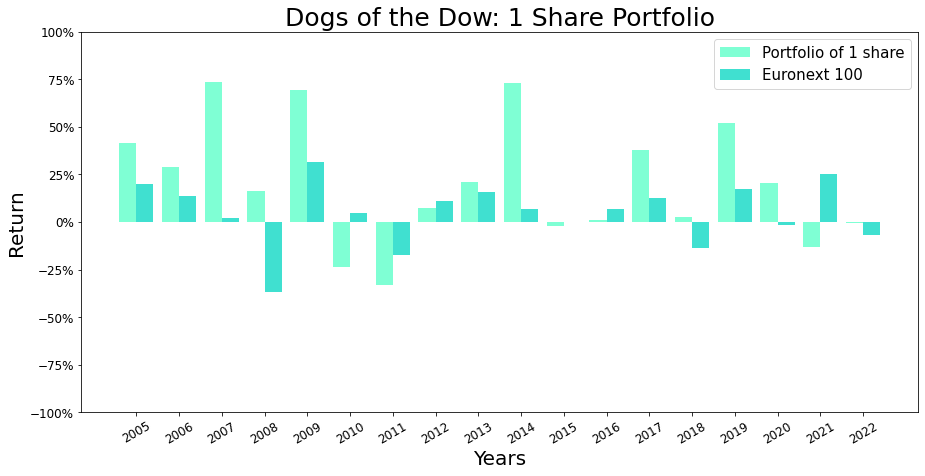

In [99]:
years = df_end.index.to_list()
p_10 = df_end['1 share'].to_list()
market = df_end['N-100'].to_list()

X_axis = np.arange(len(years))

plt.figure(figsize=(15, 7))

p_return = plt.bar(X_axis - 0.2, p_10, 0.4, label='Portfolio of 1 share', color='aquamarine')
m_return = plt.bar(X_axis + 0.2, market, 0.4, label='Euronext 100', color='turquoise')

plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(X_axis, years, fontsize=12, rotation=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Return", fontsize=20)
plt.title("Dogs of the Dow: 1 Share Portfolio", fontsize=25)

plt.legend(fontsize=15)

plt.show()

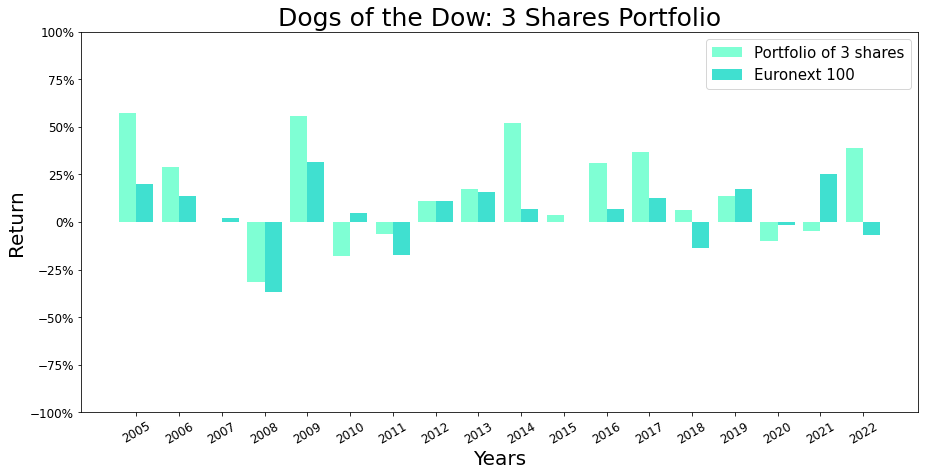

In [100]:
years = df_end.index.to_list()
p_10 = df_end['3 shares'].to_list()
market = df_end['N-100'].to_list()

X_axis = np.arange(len(years))

plt.figure(figsize=(15, 7))

p_return = plt.bar(X_axis - 0.2, p_10, 0.4, label='Portfolio of 3 shares', color='aquamarine')
m_return = plt.bar(X_axis + 0.2, market, 0.4, label='Euronext 100', color='turquoise')

plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(X_axis, years, fontsize=12, rotation=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Return", fontsize=20)
plt.title("Dogs of the Dow: 3 Shares Portfolio", fontsize=25)

plt.legend(fontsize=15)

plt.show()

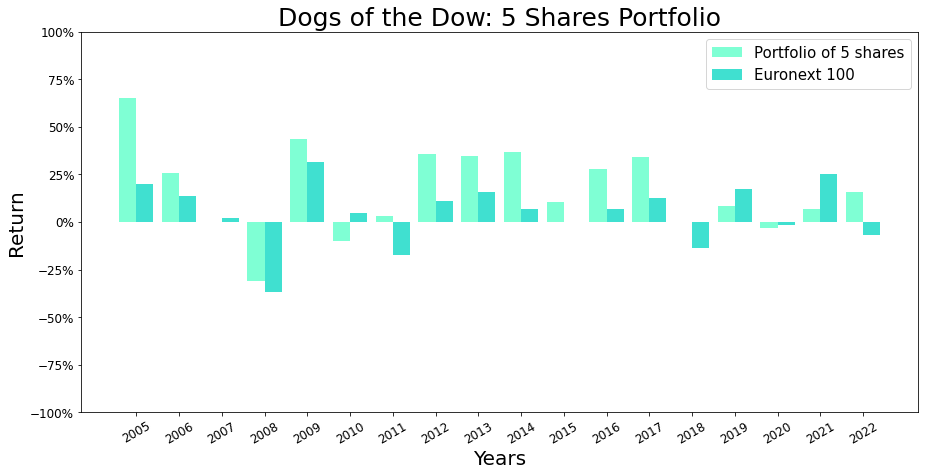

In [101]:
years = df_end.index.to_list()
p_10 = df_end['5 shares'].to_list()
market = df_end['N-100'].to_list()

X_axis = np.arange(len(years))

plt.figure(figsize=(15, 7))

p_return = plt.bar(X_axis - 0.2, p_10, 0.4, label='Portfolio of 5 shares', color='aquamarine')
m_return = plt.bar(X_axis + 0.2, market, 0.4, label='Euronext 100', color='turquoise')

plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(X_axis, years, fontsize=12, rotation=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Return", fontsize=20)
plt.title("Dogs of the Dow: 5 Shares Portfolio", fontsize=25)

plt.legend(fontsize=15)

plt.show()

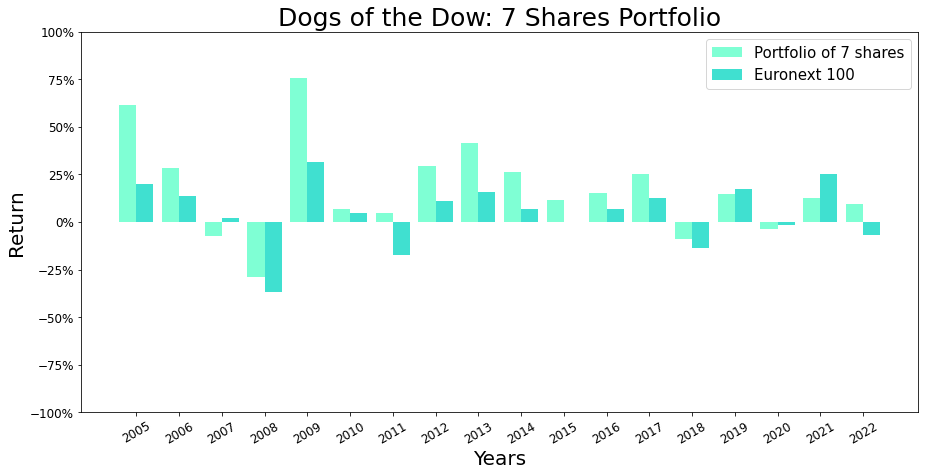

In [102]:
years = df_end.index.to_list()
p_10 = df_end['7 shares'].to_list()
market = df_end['N-100'].to_list()

X_axis = np.arange(len(years))

plt.figure(figsize=(15, 7))

p_return = plt.bar(X_axis - 0.2, p_10, 0.4, label='Portfolio of 7 shares', color='aquamarine')
m_return = plt.bar(X_axis + 0.2, market, 0.4, label='Euronext 100', color='turquoise')

plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(X_axis, years, fontsize=12, rotation=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Return", fontsize=20)
plt.title("Dogs of the Dow: 7 Shares Portfolio", fontsize=25)

plt.legend(fontsize=15)

plt.show()

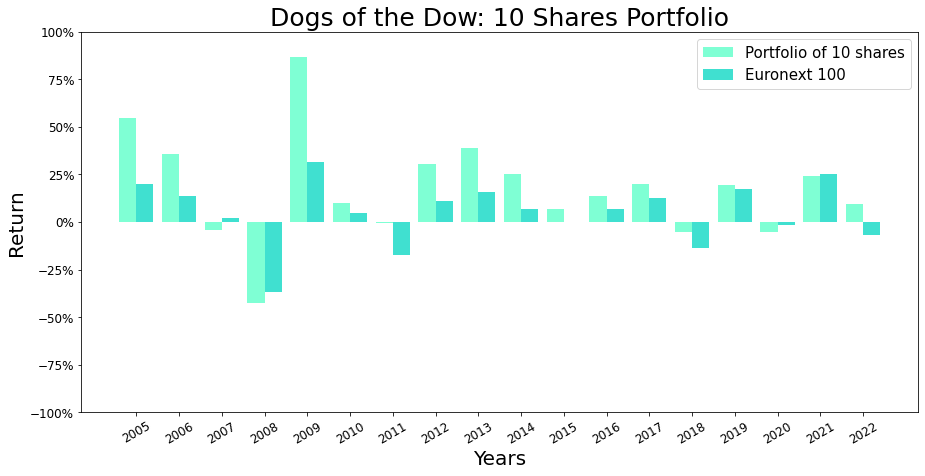

In [103]:
years = df_end.index.to_list()
p_10 = df_end['10 shares'].to_list()
market = df_end['N-100'].to_list()

X_axis = np.arange(len(years))

plt.figure(figsize=(15, 7))

p_return = plt.bar(X_axis - 0.2, p_10, 0.4, label='Portfolio of 10 shares', color='aquamarine')
m_return = plt.bar(X_axis + 0.2, market, 0.4, label='Euronext 100', color='turquoise')

plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(X_axis, years, fontsize=12, rotation=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Return", fontsize=20)
plt.title("Dogs of the Dow: 10 Shares Portfolio", fontsize=25)

plt.legend(fontsize=15)

plt.show()

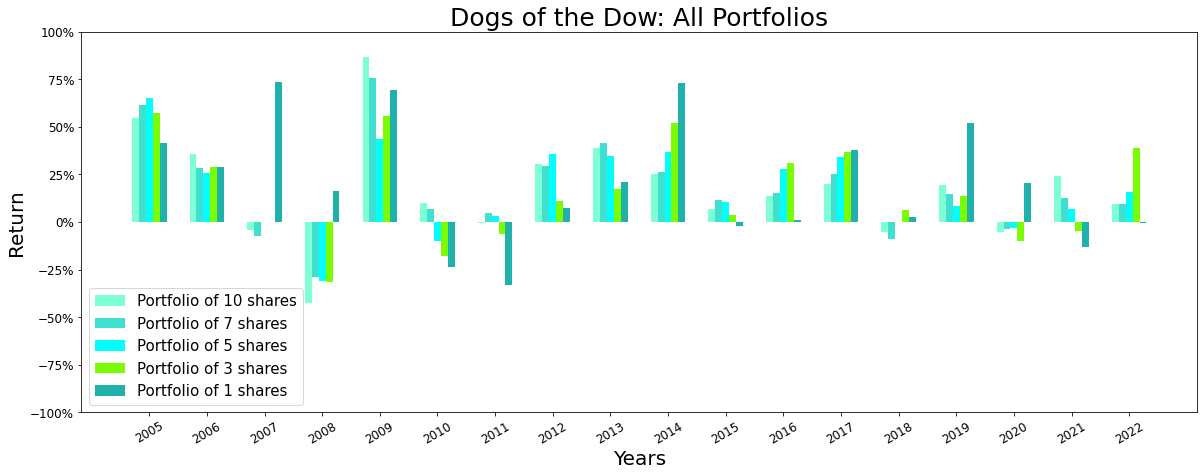

In [104]:
df = pd.read_excel('growth(DY).xlsx', sheet_name='Sheet1')
df_end = df.set_index('Year')

years = df_end.index.to_list()
p_10 = df_end['10 shares'].to_list()
p_7 = df_end['7 shares'].to_list()
p_5 = df_end['5 shares'].to_list()
p_3 = df_end['3 shares'].to_list()
p_1 = df_end['1 share'].to_list()
market = df_end['N-100'].to_list()

X_axis = np.arange(len(years))

plt.figure(figsize=(20, 7))

p__10_return = plt.bar(X_axis - 0.24, p_10, 0.12, label='Portfolio of 10 shares', color='aquamarine')
p__7_return = plt.bar(X_axis - 0.12, p_7, 0.12, label='Portfolio of 7 shares', color='turquoise')
p__5_return = plt.bar(X_axis, p_5, 0.12, label='Portfolio of 5 shares', color='aqua')
p__3_return = plt.bar(X_axis + 0.12, p_3, 0.12, label='Portfolio of 3 shares', color='lawngreen')
p__1_return = plt.bar(X_axis + 0.24, p_1, 0.12, label='Portfolio of 1 shares', color='lightseagreen')
#m_return = plt.bar(X_axis + 0.36, market, 0.12, label='Euronext 100', color='SlateGrey')


plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(X_axis, years, fontsize=12, rotation=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Return", fontsize=20)
plt.title("Dogs of the Dow: All Portfolios", fontsize=25)

plt.legend(fontsize=15)

plt.show()

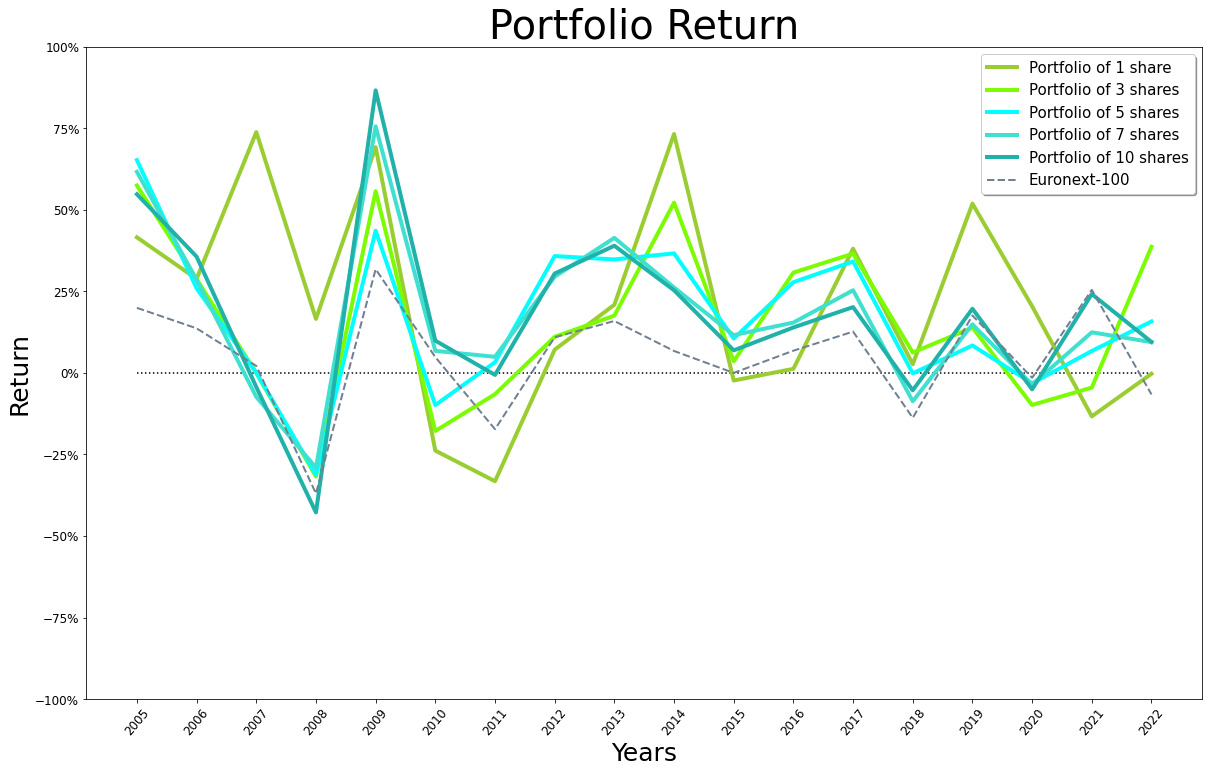

In [105]:

line = []
for i in years:
    line.append(0)

plt.figure(figsize=(20, 12))

plt.plot(years, line, linestyle='dotted', color='black')
plt.plot(years, p_1, label='Portfolio of 1 share', linewidth = 4, color='YellowGreen')
plt.plot(years, p_3, label='Portfolio of 3 shares', linewidth = 4, color='lawngreen')
plt.plot(years, p_5, label='Portfolio of 5 shares', linewidth = 4, color='aqua')
plt.plot(years, p_7, label='Portfolio of 7 shares', linewidth = 4, color='turquoise')
plt.plot(years, p_10, label='Portfolio of 10 shares', linewidth = 4, color='lightseagreen')
plt.plot(years, market, label='Euronext-100', linewidth = 2, linestyle='--', color='SlateGrey')


plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(years, fontsize=12, rotation=50)
plt.xlabel("Years", fontsize=25)
plt.ylabel("Return", fontsize=25)
plt.title("Portfolio Return", fontsize=40)
plt.legend(fontsize=15, shadow=True)

plt.show()

## пересмотреть

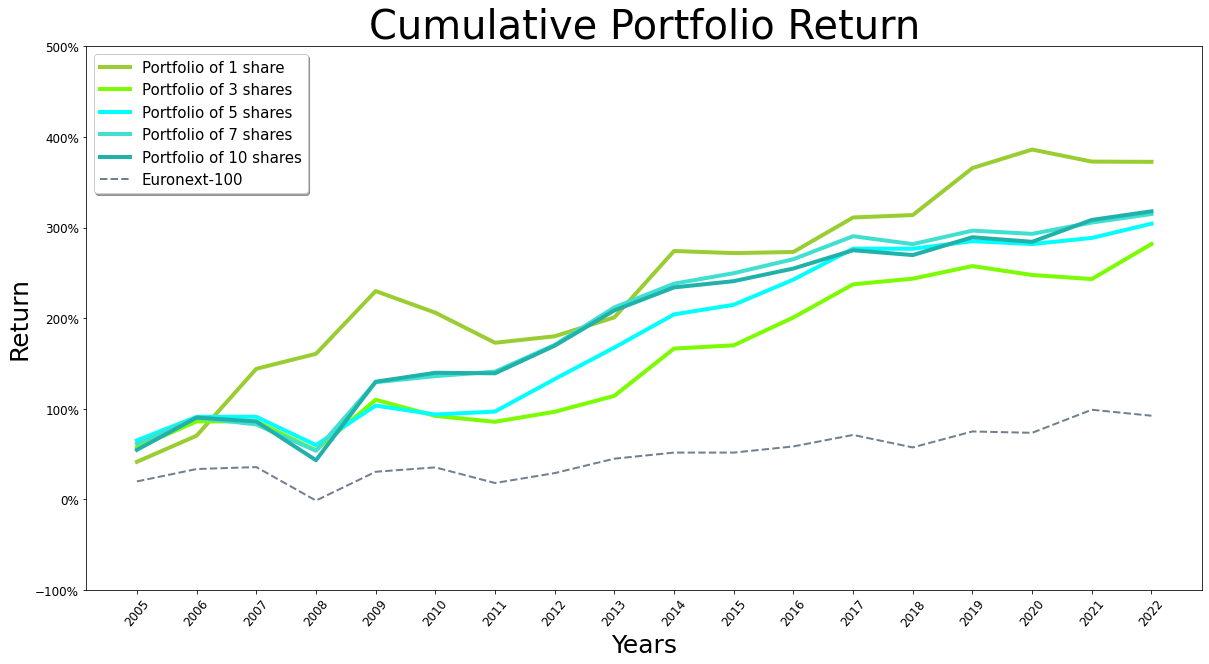

In [107]:
df = pd.read_excel('growth(DY).xlsx', sheet_name='Sheet2')
df_end = df.set_index('Year')

years = df_end.index.to_list()
p_10 = df_end['10 shares'].to_list()
p_7 = df_end['7 shares'].to_list()
p_5 = df_end['5 shares'].to_list()
p_3 = df_end['3 shares'].to_list()
p_1 = df_end['1 share'].to_list()
market = df_end['N-100'].to_list()
perc = ['-100%', '0%', '100%', '200%', '300%', '400%', '500%']

plt.figure(figsize=(20, 10))

plt.plot(years, p_1, label='Portfolio of 1 share', linewidth = 4, color='YellowGreen')
plt.plot(years, p_3, label='Portfolio of 3 shares', linewidth = 4, color='lawngreen')
plt.plot(years, p_5, label='Portfolio of 5 shares', linewidth = 4, color='aqua')
plt.plot(years, p_7, label='Portfolio of 7 shares', linewidth = 4, color='turquoise')
plt.plot(years, p_10, label='Portfolio of 10 shares', linewidth = 4, color='lightseagreen')
plt.plot(years, market, label='Euronext-100', linewidth = 2, linestyle='--', color='SlateGrey')


plt.ylim([-1, 5])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(years, fontsize=12, rotation=50)
plt.xlabel("Years", fontsize=25)
plt.ylabel("Return", fontsize=25)
plt.title("Cumulative Portfolio Return", fontsize=40)
plt.legend(fontsize=15, shadow=True)

plt.show()